In [1]:
import pygplates
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline
%load_ext autoreload
%autoreload 2

print pygplates.__version__

from GPlatesReconstructionModel import ReconstructionModel, PointDistributionOnSphere


2.1.0.19


In [2]:
# Build an object describing a reconstruction model

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_static_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz')


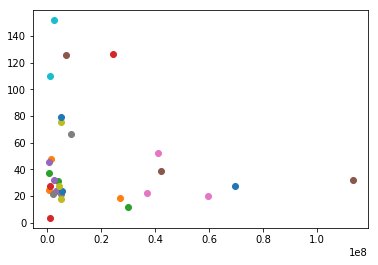

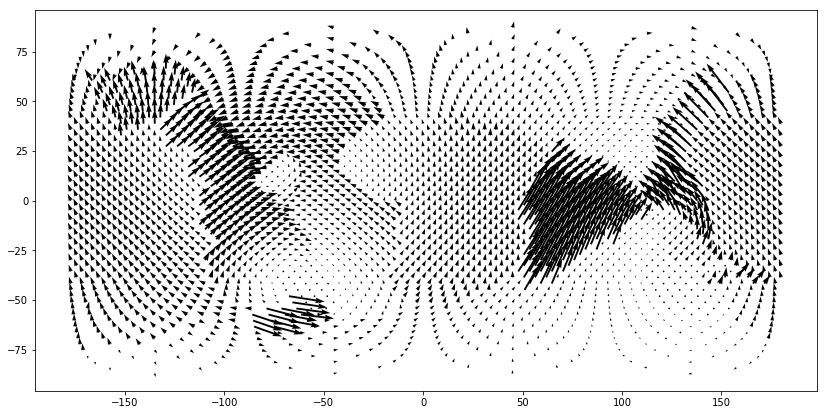

In [3]:
plates_90Ma = M2016.plate_snapshot(60.)

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=16)

velocity_object = plates_90Ma.velocity_field(
    velocity_domain_features=[equal_area_points.meshnode_feature])

plt.figure()
for plate_id,plate_area in zip(plates_90Ma.plate_ids,plates_90Ma.plate_areas):
    plt.plot(plate_area,velocity_object.rms_velocity(plate_id),'o')
plt.show()


plt.figure(figsize=(14,7))
plt.quiver(velocity_object.longitude,
           velocity_object.latitude,
           velocity_object.velocity_east,
           velocity_object.velocity_north)
plt.show()


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200


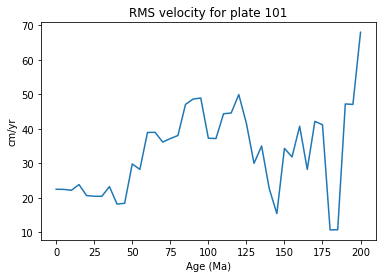

In [4]:
plate_id = 101
rms = []
time_list = range(0,201,5)

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=16)

for time in time_list:
    print time
    plates = M2016.plate_snapshot(time)
    velocity_object = plates.velocity_field(
        velocity_domain_features=[equal_area_points.meshnode_feature])
    rms.append(velocity_object.rms_velocity(plate_id))
    

plt.plot(time_list,rms)
plt.title('RMS velocity for plate %d' % plate_id)
plt.xlabel('Age (Ma)')
plt.ylabel('cm/yr')
plt.show()
